In [1]:
#links:
#https://towardsdatascience.com/back-to-basics-assumptions-of-common-machine-learning-models-e43c02325535
#https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/
#https://towardsdatascience.com/assumptions-of-multiple-linear-regression-d16f2eb8a2e7

#https://www.kaggle.com/code/raghurayirath/complete-guide-assumptions-of-linear-regression
#https://www.kaggle.com/code/arunmohan003/linear-regression-analysis-validating-assumptions
#https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression

In [54]:
import numpy as np
import pandas as pd
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
import warnings
warnings.filterwarnings(action="ignore")

#### CRIM - per capita crime rate by town
#### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#### INDUS - proportion of non-retail business acres per town.
#### CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#### NOX - nitric oxides concentration (parts per 10 million)
#### RM - average number of rooms per dwelling
#### AGE - proportion of owner-occupied units built prior to 1940
#### DIS - weighted distances to five Boston employment centres
#### RAD - index of accessibility to radial highways
#### TAX - full-value property-tax rate per Dollar 10,000
#### PTRATIO -  pupil-teacher ratio by town
#### B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#### LSTAT - % lower status of the population
#### MEDV - Median value of owner-occupied homes in $1000's

In [26]:
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/Practice_2023/housing.csv',header=None, delimiter=r"\s+", names=column_names)
print(data.shape)
data.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [33]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']

In [34]:
#OLS Regression Results
X = sm.add_constant(X)
model = sm.OLS(y,X)
result = model.fit()

In [35]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        22:31:12   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

## 1) Linear Relationship

### For checking this assumption, we can use **`scatter plot`** to visualise the relationship between independent variable and target variable.
### high coef high linear relationship, low coef low linear relationship
###  if the relationship is not linear, we can do **`transformations`** to get the relationship near to linear


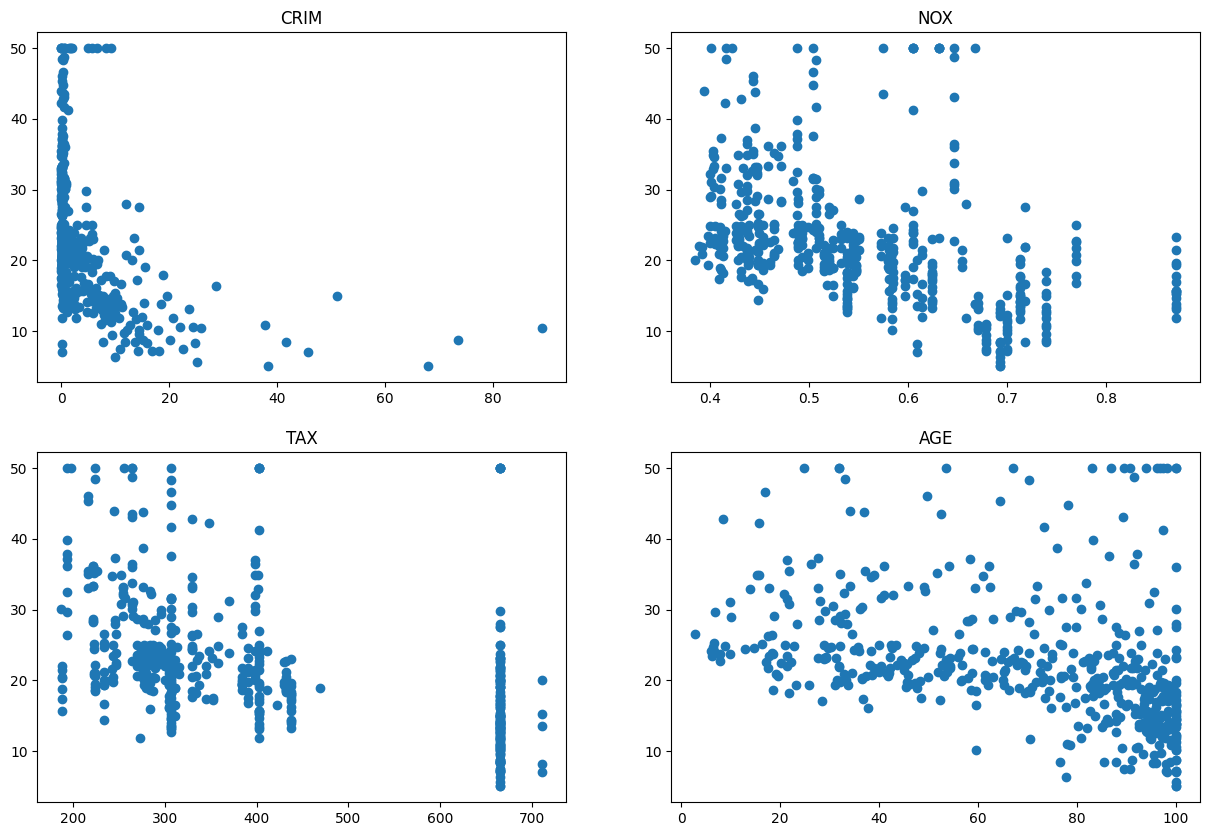

In [36]:
plt.rcParams["figure.figsize"] =(15,10)
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2)

ax1.scatter(data['CRIM'], data['MEDV'])
ax1.set_title("CRIM")
ax2.scatter(data['NOX'], data['MEDV'])
ax2.set_title("NOX")
ax3.scatter(data['TAX'], data['MEDV'])
ax3.set_title("TAX")
ax4.scatter(data['AGE'], data['MEDV'])
ax4.set_title("AGE")

plt.show()

## 2) Multi-collinearity

#### Variance inflation factor
#### By calculating **`variance_inflation_factor`**, we can check the multicollinearity between independent varibales.
#### If VIF score greater than 5 means, we can eliminate those varibale from our analysis.
#### The reason is that information is already present in another variable.

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = {X.columns[i]: variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])}

In [38]:
pd.DataFrame({'VIF': VIF}, index=X.columns)

,VIF
const,NaN
CRIM,1.792192
ZN,2.298758
INDUS,3.991596
CHAS,1.073995
NOX,4.393720
RM,1.933744
AGE,3.100826
DIS,3.955945
RAD,7.484496


<AxesSubplot: >

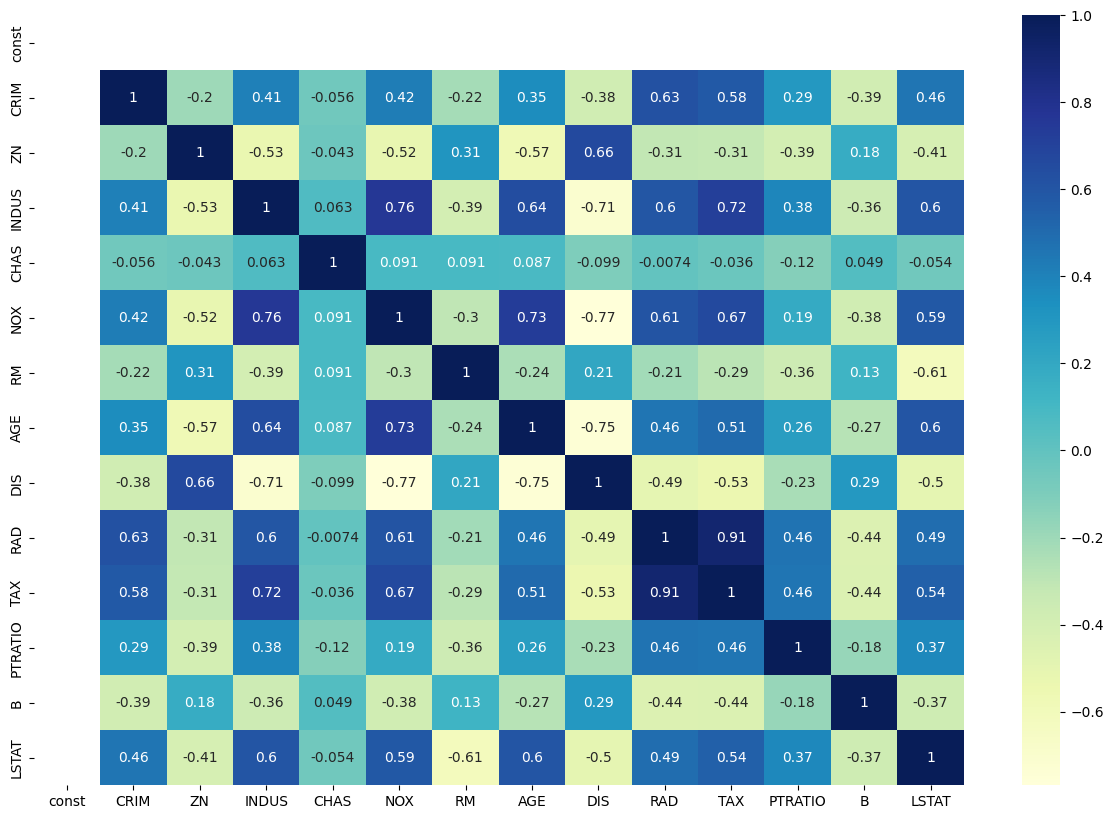

In [39]:
#Heatmap
sns.heatmap(X.corr(),annot=True, cmap="YlGnBu")

## 3) Normality of Residual

#### To check the normality of the residual, we can plot Q-Q plot, or histogram mean of residial will be close to zero, of the residual is normally distributed

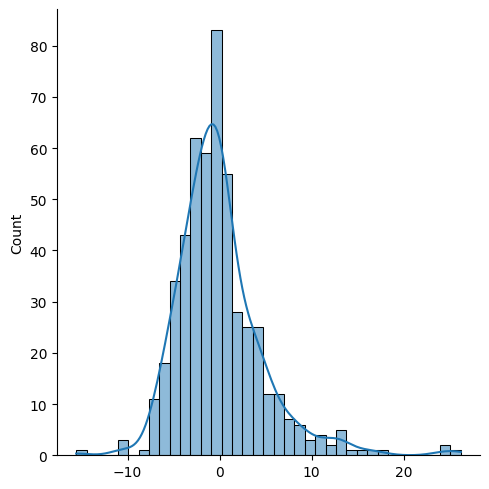

In [41]:
#Distplot residual
residual = result.resid
sns.displot(residual, kde=True)

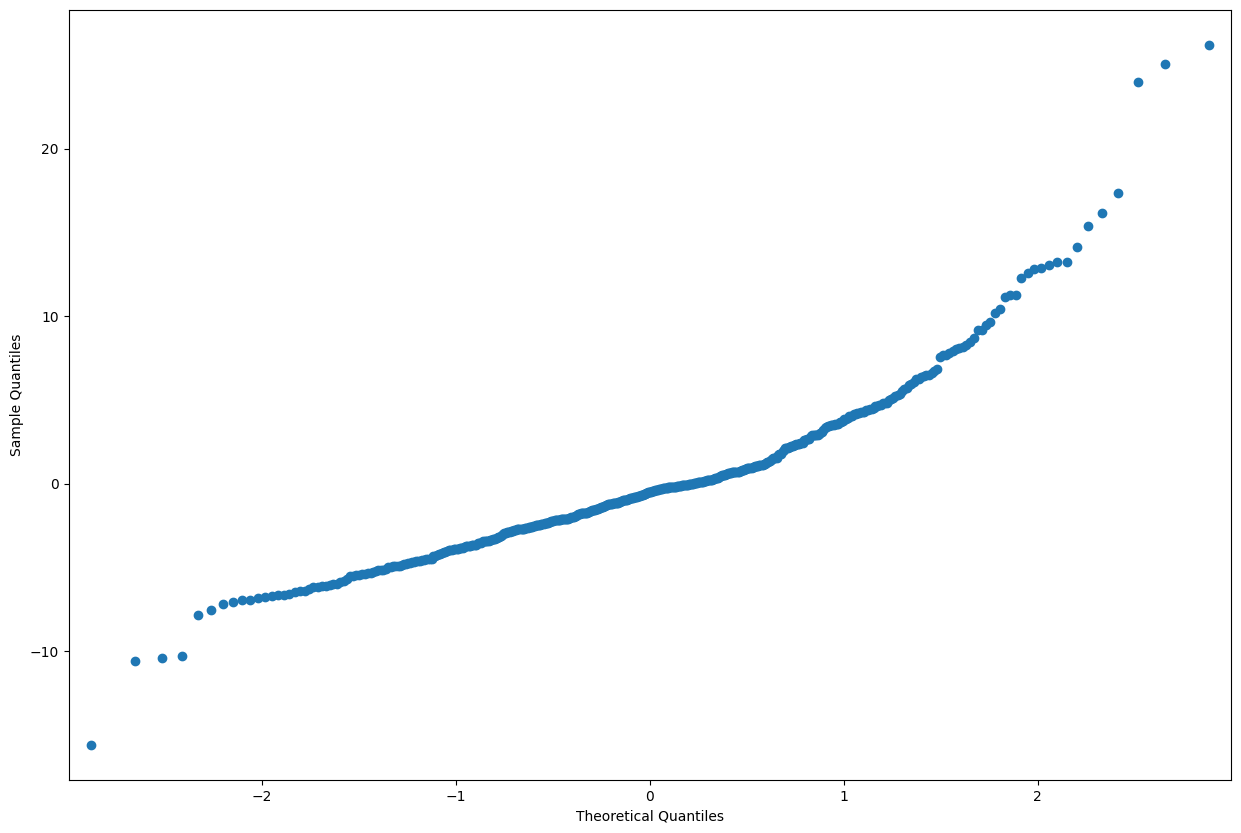

In [43]:
#QQ Plot
residual = result.resid
sm.qqplot(residual)
plt.show()

## 4) Homoscedasticity - constant variance

#### If we plot the erros/ residuals vs predicted value. Erros should be random for all the predicted values

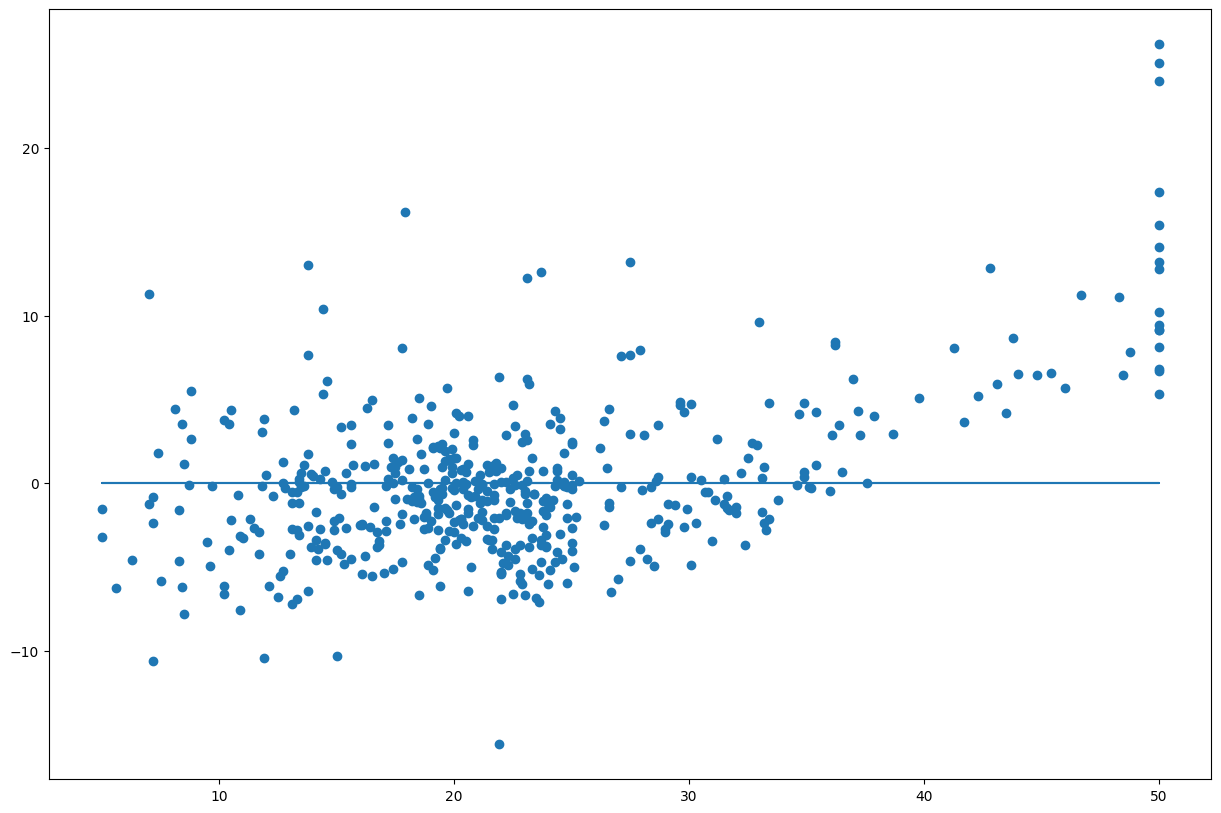

In [44]:
residual = result.resid
plt.scatter(y, residual)
plt.plot(y, [0]*len(y))

## 5) No Autocorrelation of Residuals

#### Residuals should not be related to each other. If residuals are related to each other, algorithm cant capture the pattern properly.

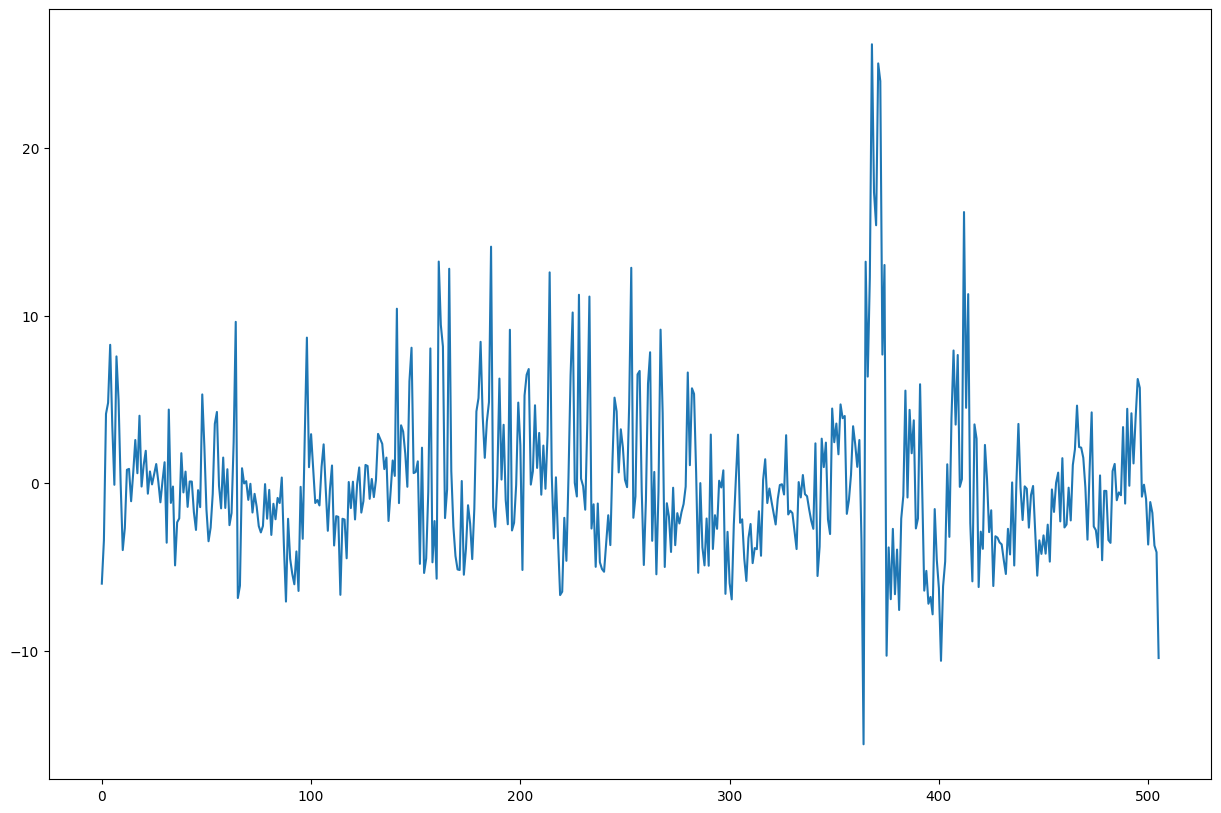

In [45]:
plt.plot(residual.index,residual)

## 6) Observations should be indepdent or not related to each other.

In [48]:
print(data.shape)
data.head(2)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [ ]:
#Models
#https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm

## Exploratory Data Analysis (EDA)

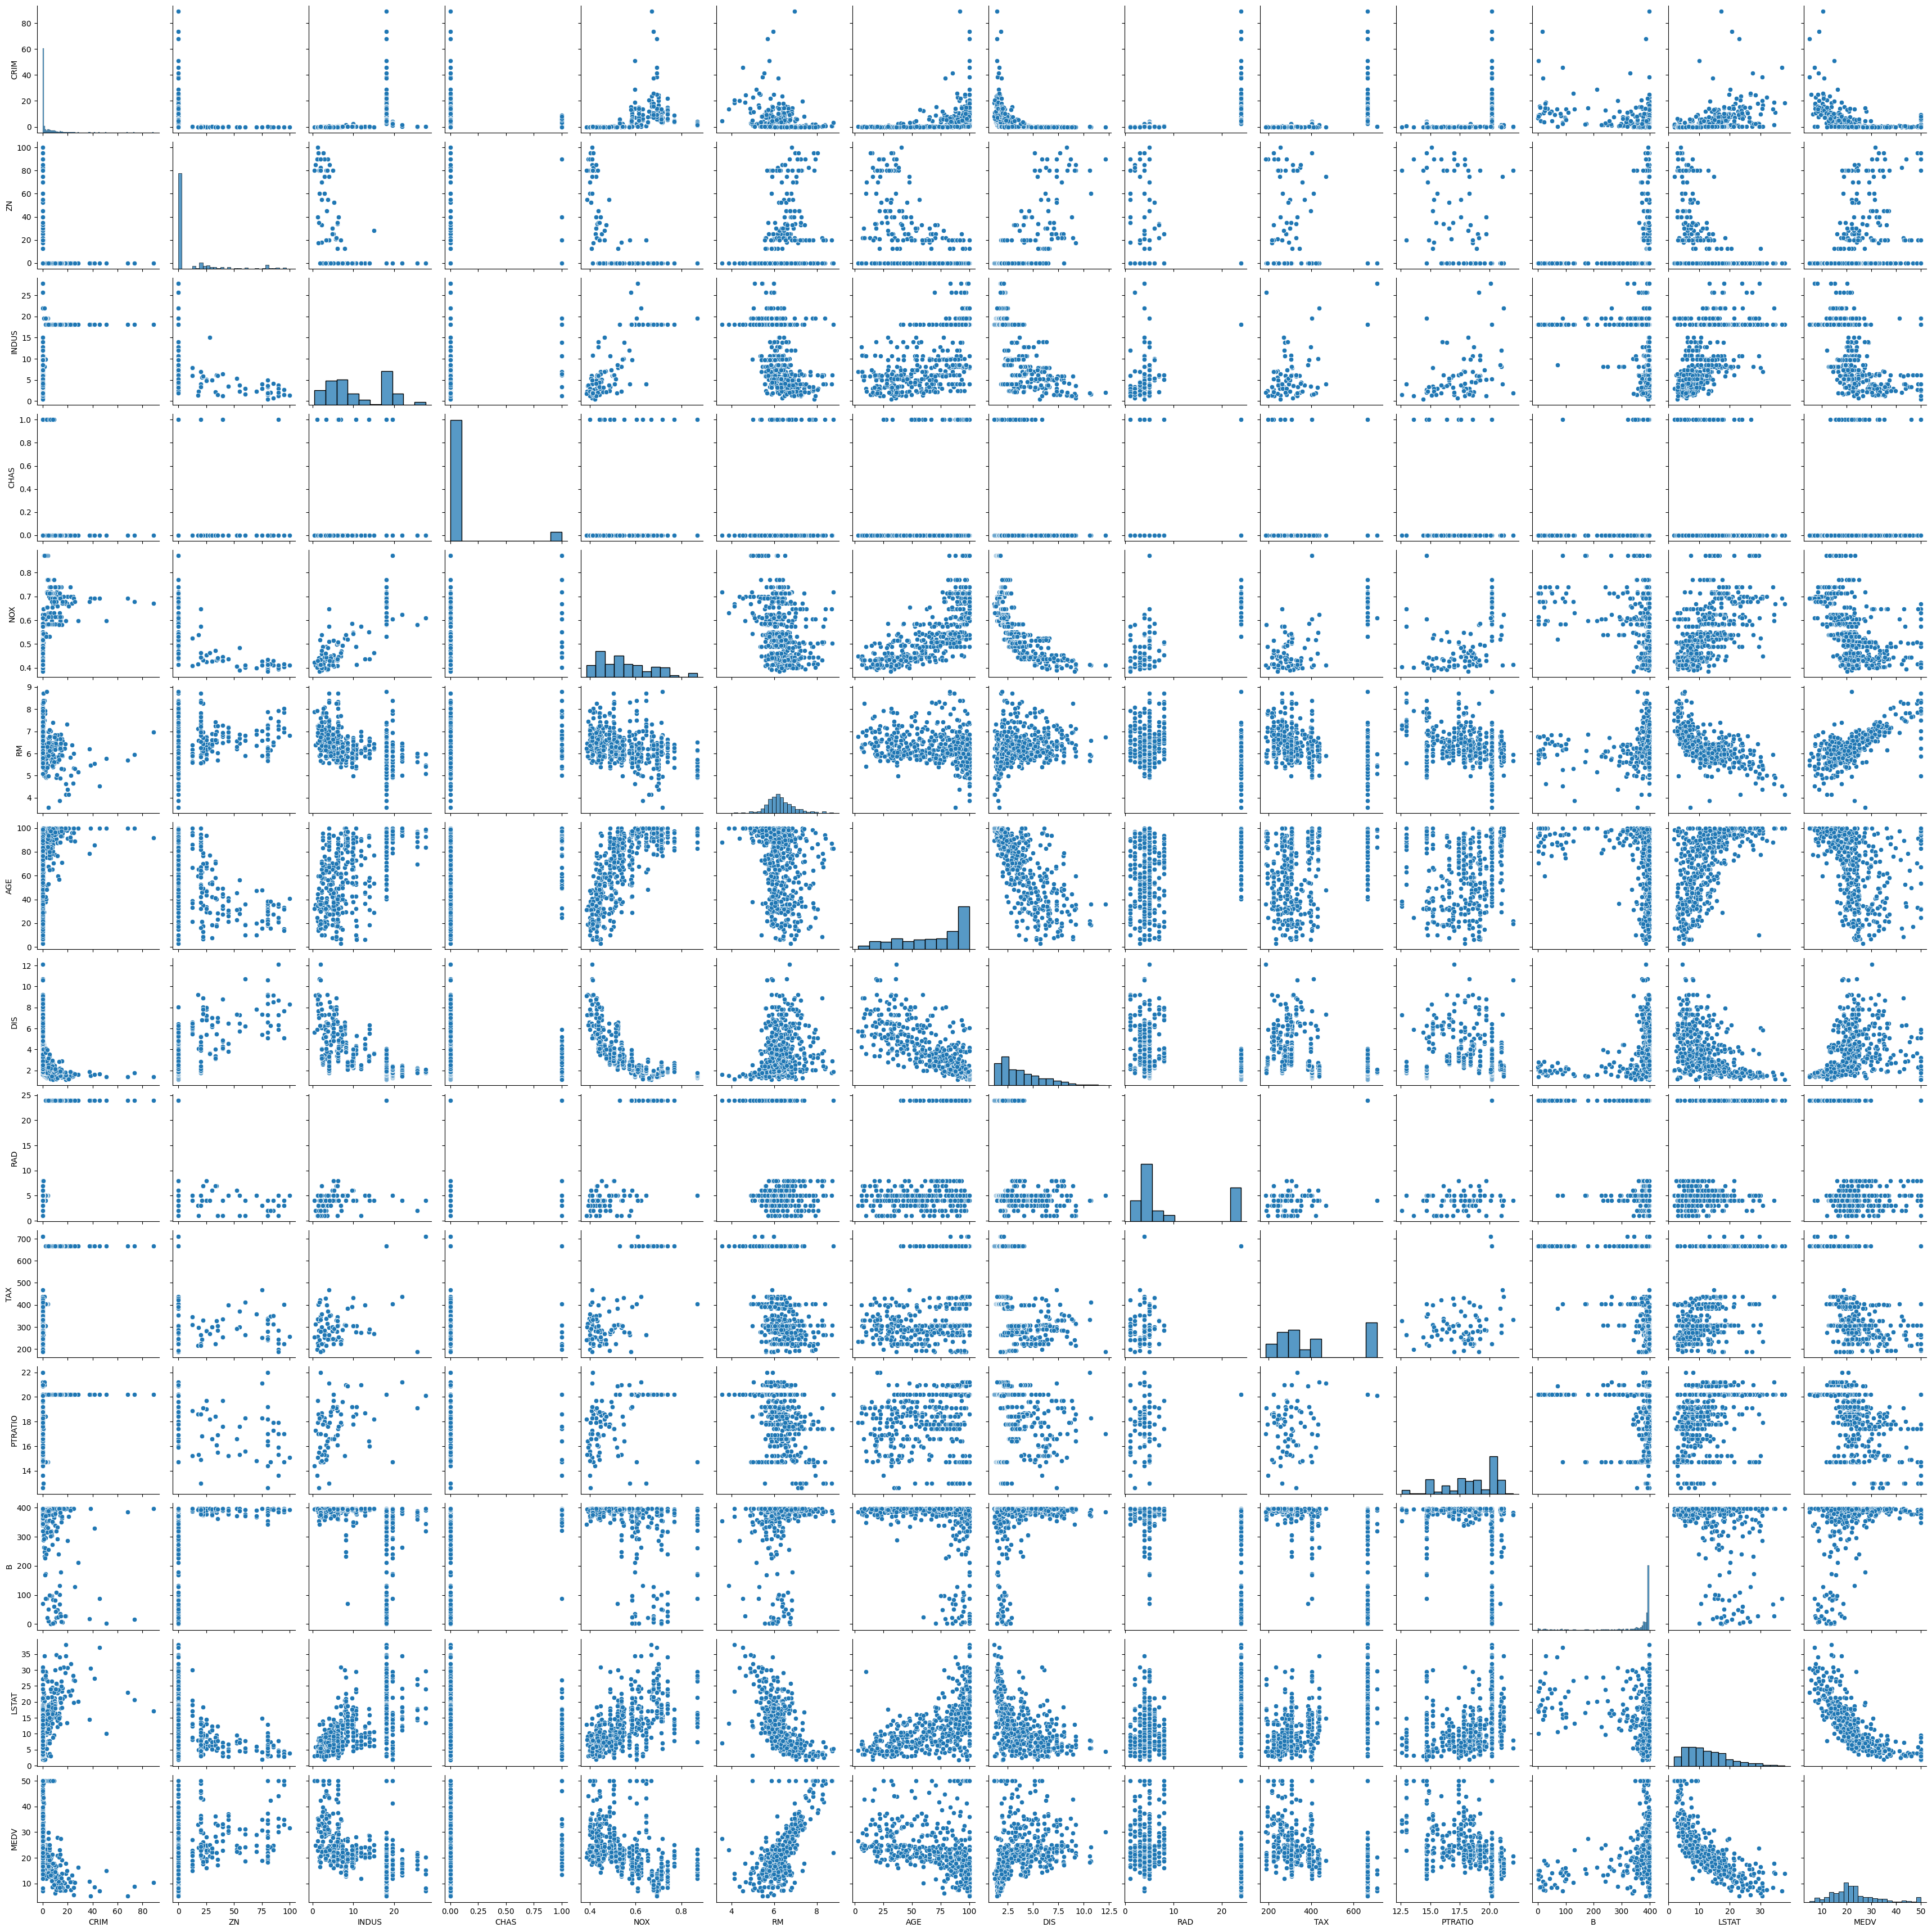

In [50]:
sns.pairplot(data)

In [55]:
data.hvplot.hist(by='MEDV', subplots=False, width=1000)

:NdOverlay   [Element]
   :Histogram   [LSTAT]   (LSTAT_count)

In [56]:
data.hvplot.hist("MEDV")

:Histogram   [MEDV]   (MEDV_count)

In [59]:
data.hvplot.scatter(x='INDUS', y='MEDV')

:Scatter   [INDUS]   (MEDV)

<AxesSubplot: >

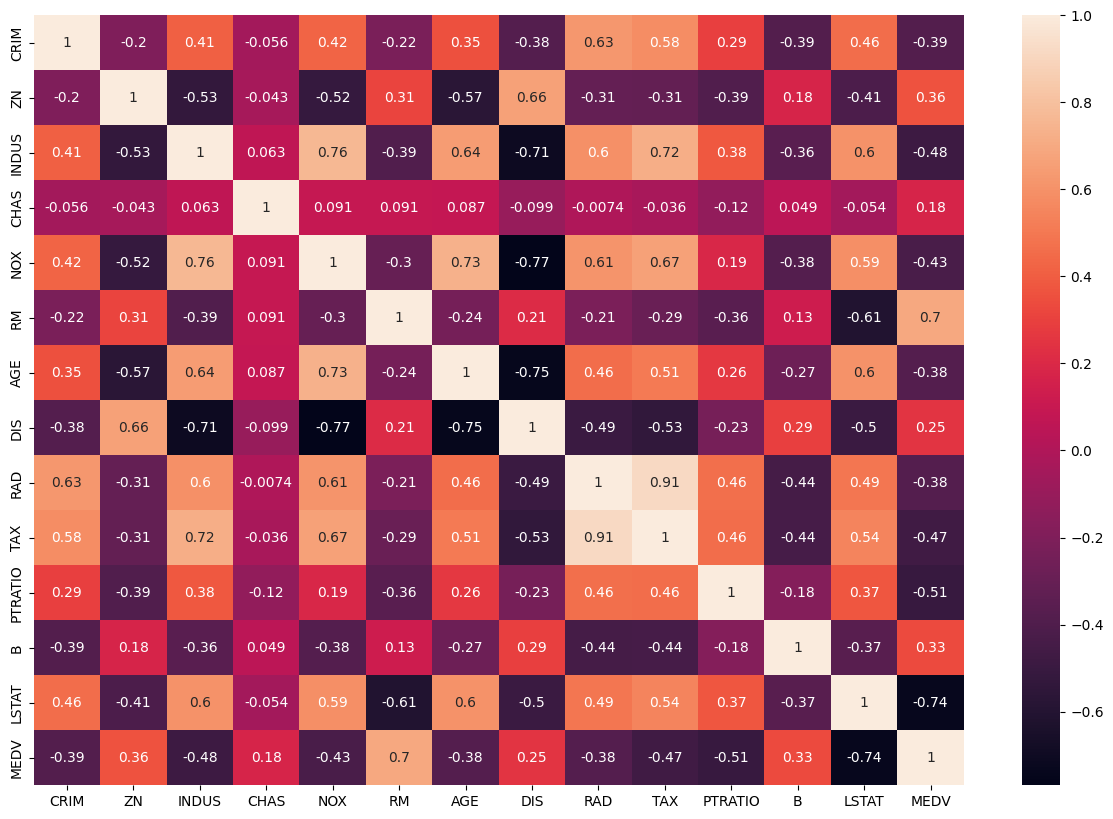

In [60]:
sns.heatmap(data.corr(), annot=True)

## Training a Linear Regression Model

In [61]:
#X and y arrays
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']

In [62]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

## Preparing Data For Linear Regression

### Try different preparations of your data using these heuristics and see what works best for your problem.

### Linear Assumption. Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
### Remove Noise. Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
### Remove Collinearity. Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
### Gaussian Distributions. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on your variables to make their distribution more Gaussian looking.
### Rescale Inputs: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([ ('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [66]:
# print the intercept
print(lin_reg.intercept_)

23.01581920903955


In [67]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
const,0.000000
CRIM,-1.108346
ZN,0.808440
INDUS,0.343135
CHAS,0.813864
NOX,-1.798043
RM,2.913858
AGE,-0.298939
DIS,-2.942511
RAD,2.094193


In [68]:
#Predictions from our Model
pred = lin_reg.predict(X_test)

pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [69]:
#Residual Histogram
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [70]:
#Regression Evaluation Metrics
# MAE is the easiest to understand, because it's the average error.
# MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
# RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [71]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 3.1627098714574124
MSE: 21.517444231177286
RMSE: 4.638689926172829
R2 Square 0.7112260057484923
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.3568267821682056
MSE: 22.545481487421426
RMSE: 4.748208239685937
R2 Square 0.7434997532004697
__________________________________


## Robust Regression

#### Robust regression is a form of regression analysis designed to overcome some limitations of traditional parametric and non-parametric methods. Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process
#### One instance in which robust estimation should be considered is when there is a strong suspicion of heteroscedasticity.
#### A common situation in which robust estimation is used occurs when the data contain outliers. 

In [72]:
#Random Sample Consensus - RANSAC
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.5996733900121822
MSE: 35.28885389683709
RMSE: 5.940442230746553
R2 Square 0.5264073566143046
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.5659440709247647
MSE: 33.90273722585452
RMSE: 5.822605707572386
R2 Square 0.6142881015664707
__________________________________


## Ridge Regression

#### Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

####  minw∣∣∣∣Xw−y∣∣∣∣22+α∣∣∣∣w∣∣∣∣22
 
#### α>=0
####   is a complexity parameter that controls the amount of shrinkage: the larger the value of  α
####  , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

#### Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.

In [73]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.2794471340623246
MSE: 23.523824060493826
RMSE: 4.850136499161011
R2 Square 0.6842994660036883
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.4197100059245766
MSE: 24.836205632355732
RMSE: 4.983593646391701
R2 Square 0.7174381537241795
__________________________________


## LASSO Regression

#### A linear model that estimates sparse coefficients.

#### Mathematically, it consists of a linear model trained with  ℓ1 prior as regularizer. 

In [74]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.7355366575411377
MSE: 32.890962869125914
RMSE: 5.735064329990197
R2 Square 0.5585881566392769
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.192504425593431
MSE: 37.7785062742652
RMSE: 6.146422233646595
R2 Square 0.57019342485664
__________________________________


##  Elastic Net

#### A linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both. A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation. 

In [75]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.198511352071156
MSE: 22.69866292948289
RMSE: 4.76431138040776
R2 Square 0.6953735077506102
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.3329229272402174
MSE: 23.037910118227042
RMSE: 4.799782299045139
R2 Square 0.737897386029768
__________________________________


## Polynomial Regression

#### One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

In [77]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.062646163137335
MSE: 25.224325433718533
RMSE: 5.022382445983035
R2 Square 0.6614779557676
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.6937168961864408
MSE: 4.660598112812824
RMSE: 2.1588418452524087
R2 Square 0.9469763124448295
__________________________________


## Stochastic Gradient Descent

#### Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [78]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.08806949564838
MSE: 23.854169745443592
RMSE: 4.8840730692162655
R2 Square 0.6798660750348635
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.275520903578535
MSE: 23.74836843665749
RMSE: 4.873229774662538
R2 Square 0.7298144921638791
__________________________________


## Artficial Neural Network

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
354/354 [==============================] - 3s 3ms/step - loss: 603.5328 - val_loss: 509.2749
Epoch 2/100
354/354 [==============================] - 1s 2ms/step - loss: 574.6486 - val_loss: 475.9223
Epoch 3/100
354/354 [==============================] - 1s 2ms/step - loss: 528.1560 - val_loss: 423.6152
Epoch 4/100
354/354 [==============================] - 1s 3ms/step - loss: 456.6337 - val_loss: 348.4242
Epoch 5/100
354/354 [==============================] - 1s 3ms/step - loss: 360.9785 - val_loss: 261.1337
Epoch 6/100
354/354 [==============================] - 1s 3ms/step - loss: 263.4159 - val_loss: 188.3155
Epoch 7/100
354/354 [==============================] - 1s 3ms/step - loss: 187.8862 - val_loss: 141.9768
Epoch 8/100
354/354 [==============================] - 1s 3ms/step - loss: 142.0705 - val_loss: 118.3788
Epoch 9/100
354/354 [==============================] - 1s 3ms/step - loss: 116.5668 - val_loss: 107.6959
Epoch 10/100
354/354 [==============================] -

354/354 [==============================] - 1s 2ms/step - loss: 25.5829 - val_loss: 26.7835
Epoch 80/100
354/354 [==============================] - 1s 2ms/step - loss: 25.2430 - val_loss: 26.6004
Epoch 81/100
354/354 [==============================] - 1s 3ms/step - loss: 25.0609 - val_loss: 26.4682
Epoch 82/100
354/354 [==============================] - 1s 2ms/step - loss: 25.3326 - val_loss: 26.3145
Epoch 83/100
354/354 [==============================] - 1s 2ms/step - loss: 25.7551 - val_loss: 26.1223
Epoch 84/100
354/354 [==============================] - 1s 2ms/step - loss: 25.6378 - val_loss: 26.0495
Epoch 85/100
354/354 [==============================] - 1s 2ms/step - loss: 25.1884 - val_loss: 25.8395
Epoch 86/100
354/354 [==============================] - 1s 2ms/step - loss: 24.1272 - val_loss: 25.7214
Epoch 87/100
354/354 [==============================] - 1s 2ms/step - loss: 24.2119 - val_loss: 25.5622
Epoch 88/100
354/354 [==============================] - 1s 2ms/step - loss: 2

In [80]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [81]:
pd.DataFrame(r.history)

,loss,val_loss
0,603.532776,509.274872
1,574.648621,475.922333
2,528.156006,423.615173
3,456.633698,348.424194
4,360.978546,261.133728
...,...,...
95,23.209774,24.377447
96,23.421671,24.240351
97,23.039833,24.122202
98,22.774878,24.045231


In [82]:
pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'])

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [83]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

12/12 [==============================] - 0s 2ms/step
Test set evaluation:
_____________________________________
MAE: 3.4571373299548505
MSE: 23.90661330389333
RMSE: 4.889438955943036
R2 Square 0.6791622583694832
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.500793349810239
MSE: 21.944267164934978
RMSE: 4.68447085218117
R2 Square 0.750339776651875
__________________________________


## Random Forest Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.108476973684218
MSE: 9.674477358486858
RMSE: 3.1103821884917706
R2 Square 0.8701640659972947
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.895607909604516
MSE: 1.8966043113559112
RMSE: 1.3771725786392608
R2 Square 0.9784223071831373
__________________________________


## Support Vector Machine

In [85]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.5451249446506155
MSE: 28.501705843115055
RMSE: 5.3386988904708845
R2 Square 0.6174940038941812
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0011246991862657592
MSE: 1.680746487611622e-06
RMSE: 0.0012964360715483128
R2 Square 0.9999999808781246
__________________________________


In [86]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.162710,21.517444,4.638690,0.711226,0.202529
1,Robust Regression,3.599673,35.288854,5.940442,0.526407,-0.364688
2,Ridge Regression,3.279447,23.523824,4.850136,0.684299,0.256167
3,Lasso Regression,3.735537,32.890963,5.735064,0.558588,0.198290
4,Elastic Net Regression,3.198511,22.698663,4.764311,0.695374,0.227749
5,Polynomail Regression,3.062646,25.224325,5.022382,0.661478,0.000000
6,Stochastic Gradient Descent,3.088069,23.854170,4.884073,0.679866,0.000000
7,Artficial Neural Network,3.457137,23.906613,4.889439,0.679162,0.000000
8,Random Forest Regressor,2.108477,9.674477,3.110382,0.870164,0.000000
9,SVM Regressor,3.545125,28.501706,5.338699,0.617494,0.000000


## Models Comparison

<AxesSubplot: ylabel='Model'>

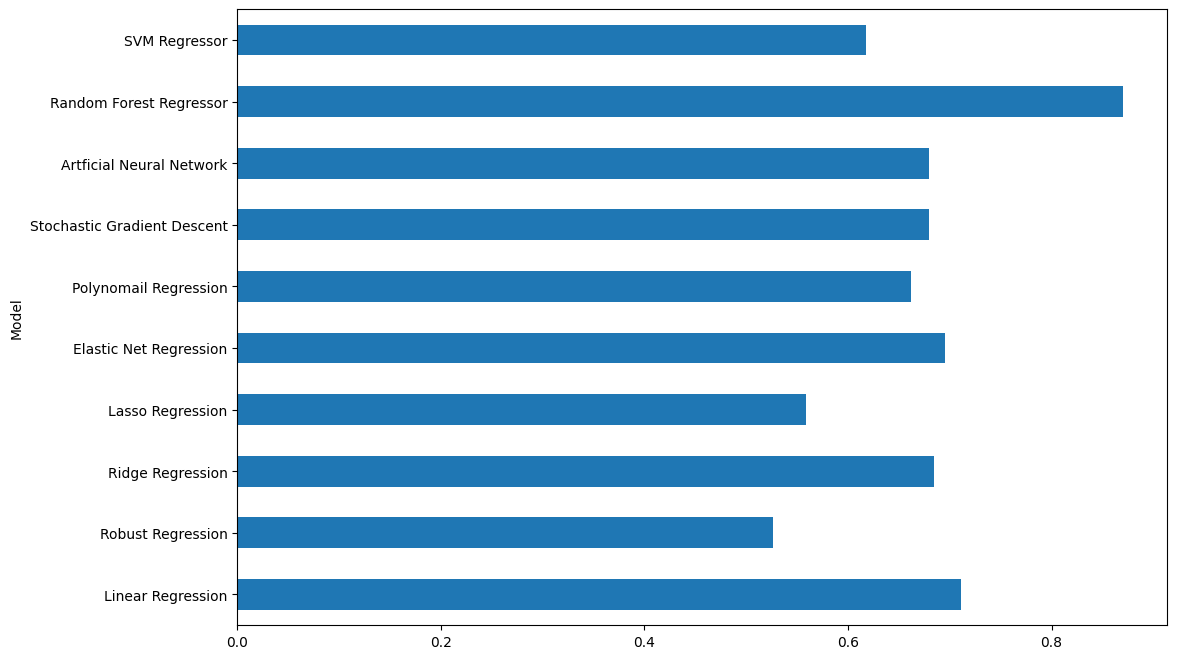

In [87]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

## Cross Validation

In [89]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [90]:
data=pd.read_csv("C:/BITsPilaniMTECH2123/Sem2/ML/Practice_2023/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
x=data.drop("Outcome",axis=1)
y=data["Outcome"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=51)
print(xtrain.shape)
print(xtest.shape)

(614, 8)
(154, 8)


In [92]:
#creating a fuction
def ModelScore(model):
    model.fit(xtrain,ytrain)
    y_pred=model.predict(xtest)
    accuracy=accuracy_score(ytest,y_pred)
    print("Accuracy score=",accuracy*100)

In [93]:
LG=LogisticRegression()
ModelScore(LG)

Accuracy score= 77.92207792207793


In [ ]:
#Types of cross-validation
#K-fold cross-validation
#Stratified k-fold cross-validation
#Leave-p-out cross-validation
#Leave-one-out cross-validation
#Monte Carlo (shuffle-split)
#Random Split
#HoldOut

### 1) K-fold cross-validation

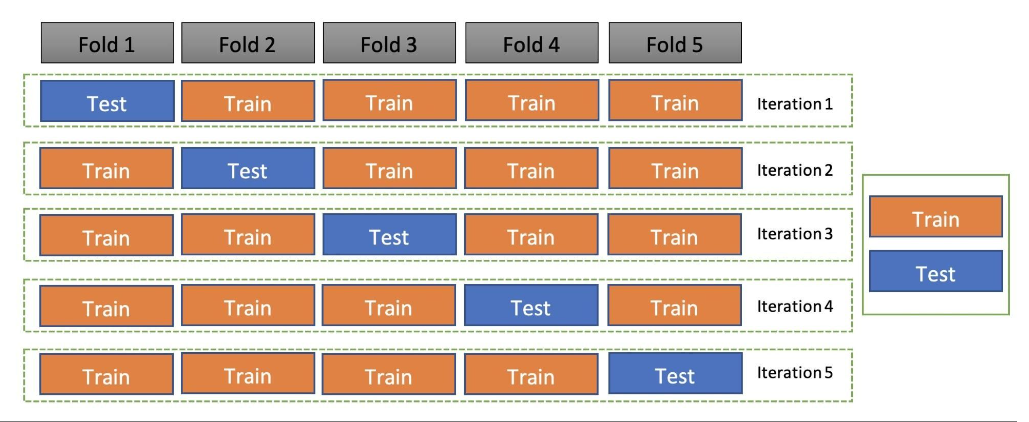

In [94]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

LG=LogisticRegression()
kfold=KFold(n_splits=5)
print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=kfold)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))
print()
print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=kfold)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0.77235772 0.7804878  0.72357724 0.84552846 0.7295082 ]
Average Cross Validation Score=0.7702918832467013

Testing Dataset
Cross Validation Scores=[0.80645161 0.58064516 0.70967742 0.77419355 0.9       ]
Average Cross Validation Score=0.7541935483870967


## 2) Stratified k-fold cross-validation

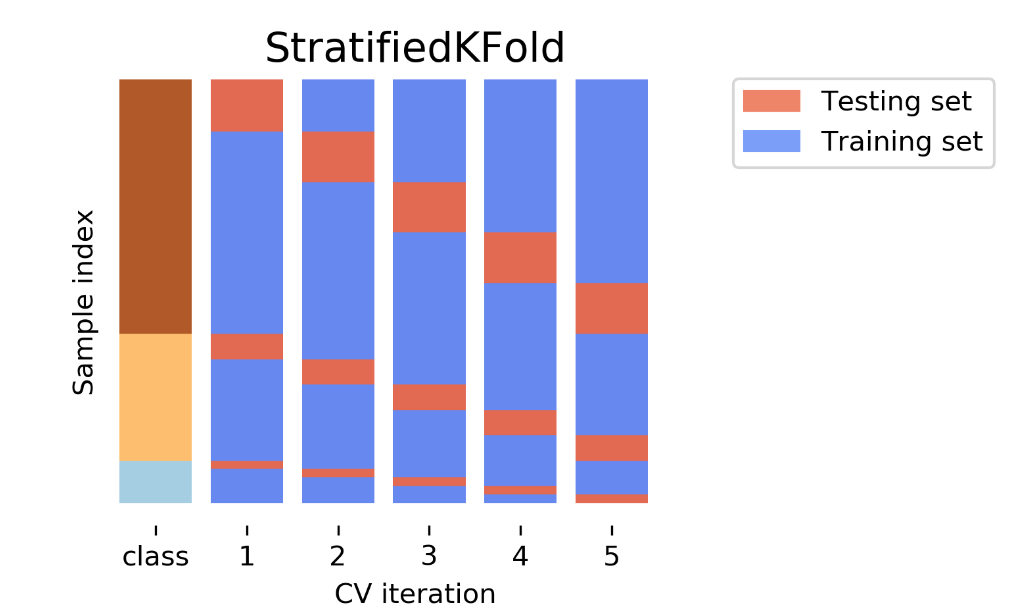

In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

LG=LogisticRegression()
skFold=StratifiedKFold(n_splits=5)

print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=skFold)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))

print()

print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=skFold)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0.77235772 0.76422764 0.7398374  0.8699187  0.70491803]
Average Cross Validation Score=0.7702518992403039

Testing Dataset
Cross Validation Scores=[0.80645161 0.70967742 0.64516129 0.70967742 0.86666667]
Average Cross Validation Score=0.7475268817204301


## 3)Leave-one-out cross-validation

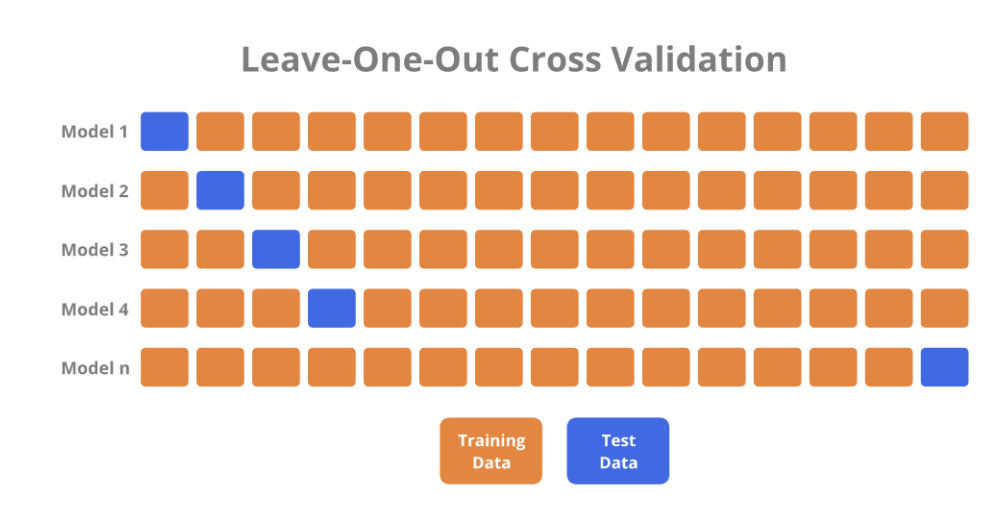

In [96]:
from sklearn.model_selection import LeaveOneOut

LG=LogisticRegression()
Leave=LeaveOneOut()

print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=Leave)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))

print()


print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=Leave)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 

## 4)Monte Carlo cross-validation or Shuffle Split

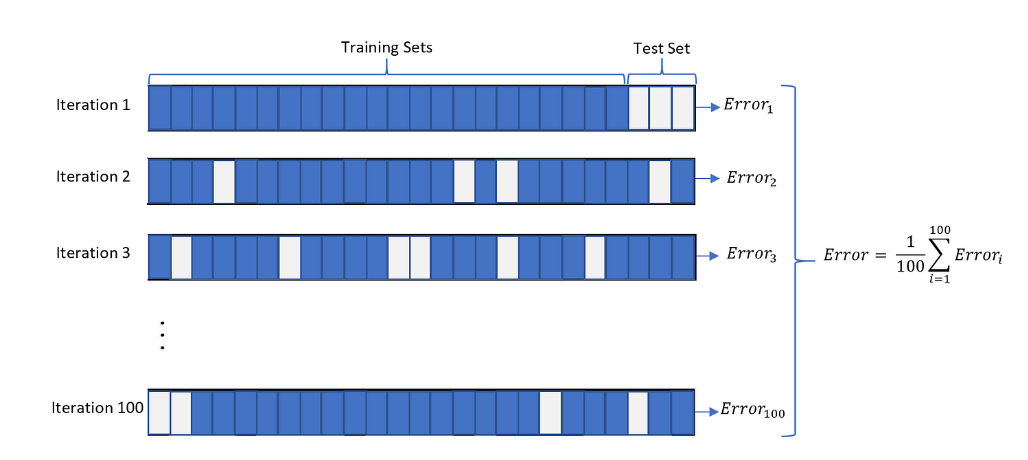

In [97]:
from sklearn.model_selection import ShuffleSplit

LG=LogisticRegression()
shuff=ShuffleSplit(train_size=0.3,test_size=0.5,n_splits=5)

print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=shuff)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))

print()

print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=shuff)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0.73289902 0.7752443  0.77198697 0.72638436 0.78501629]
Average Cross Validation Score=0.7583061889250814

Testing Dataset
Cross Validation Scores=[0.71428571 0.76623377 0.66233766 0.77922078 0.74025974]
Average Cross Validation Score=0.7324675324675325


## 5)Leave-p-out cross-validation

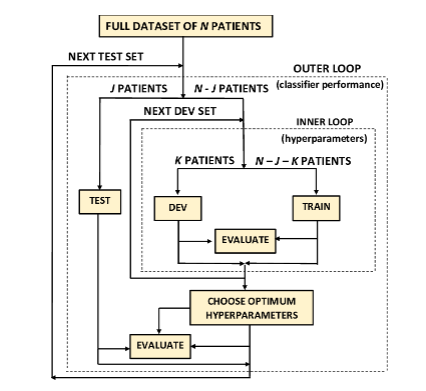

In [98]:
from sklearn.model_selection import LeavePOut


LG=LogisticRegression()
lpo=LeavePOut(p=1)

print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=lpo)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))

print()

print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=lpo)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 

## 6) Random Split

In [104]:
data=pd.read_csv("C:/BITsPilaniMTECH2123/Sem2/ML/Practice_2023/diabetes.csv")

In [105]:
from sklearn.model_selection import train_test_split
y=data['Outcome']
X=data
X.drop(['Outcome'],axis=1,inplace=True)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,stratify=y,random_state = 1)

## 7) HoldOut

In [106]:
#Times Series Data

In [ ]:
#Hyperparameter Tuning 
#Grid Search CV
#Random Search CV

#### Manual: select hyperparameters based on intuition/experience/guessing, train the model with the hyperparameters, and score on the validation data. Repeat process until you run out of patience or are satisfied with the results.
#### Grid Search: set up a grid of hyperparameter values and for each combination, train a model and score on the validation data. In this approach, every single combination of hyperparameters values is tried which can be very inefficient!
#### Random search: set up a grid of hyperparameter values and select random combinations to train the model and score. The number of search iterations is set based on time/resources.
#### Automated Hyperparameter Tuning: use methods such as gradient descent, Bayesian Optimization, or evolutionary algorithms to conduct a guided search for the best hyperparameters.

In [ ]:
#https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm
#https://www.kaggle.com/code/aashita/regression-algorithms
#https://www.kaggle.com/code/kuchhbhi/cross-validation-and-it-s-types/notebook
#https://www.kaggle.com/code/maheshkhanapure/cross-validation-and-types
#https://www.kaggle.com/code/willkoehrsen/intro-to-model-tuning-grid-and-random-search
#https://www.kaggle.com/code/vikumsw/guide-on-hyperparameter-tuning-using-gridsearchcv